# Supplementary figures and their methods

## pLDDT vs RMSDvCrystal

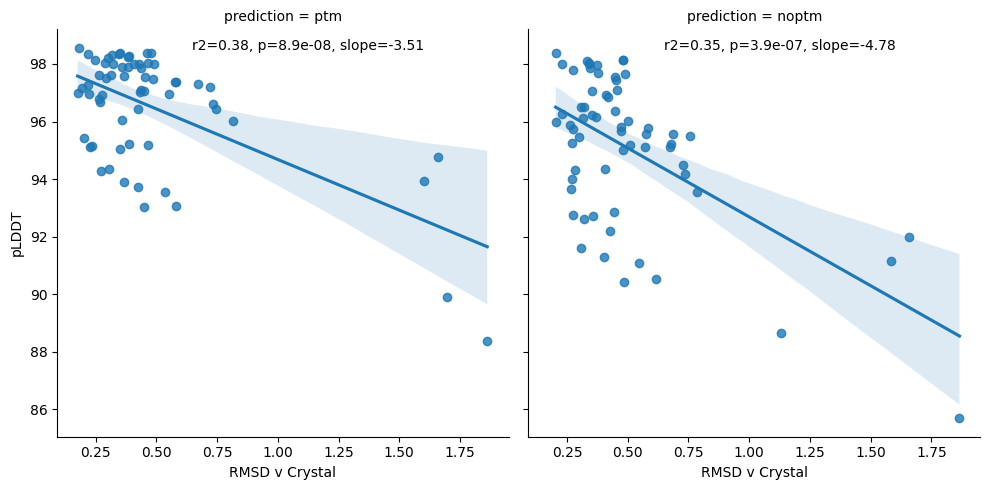

In [6]:
import scipy as sp
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from functions.Sliding_Functions import local_rmsd_plotter
from functions.CIF_Functions import make_df_atomlist

atomlist = ["CA","N","C"]
#atomlist = ["CA"]

## PTMS
ptm_df = make_df_atomlist("cif_files/Predictions/SEEDMATCHED/fold_adnan_seed42_ptms/fold_adnan_seed42_ptms_model_3.cif",atomlist)
## NO PTMS
noptm_df = make_df_atomlist("cif_files/Predictions/SEEDMATCHED/fold_adnan_seed1_noptms/fold_adnan_seed1_noptms_model_1.cif",atomlist)
## CRYSTAL
crystal_df = make_df_atomlist("cif_files/Crystals/7stz (1).cif",atomlist)

win = 75
residues,rmsds,avgplddt = local_rmsd_plotter(ptm_df,crystal_df,25,win)
noptm_residues,noptm_rmsds,noptm_avgplddt = local_rmsd_plotter(noptm_df,crystal_df,25,win)

df_plt= pd.DataFrame({"RMSD v Crystal":rmsds+noptm_rmsds,
                "pLDDT":avgplddt+noptm_avgplddt,
                "residues":residues+noptm_residues,
                "prediction":["ptm" for i in range(len(rmsds))]+["noptm" for i in range(len(rmsds))]
                })


g = sns.lmplot(data=df_plt,x="RMSD v Crystal",y='pLDDT',height=5,col='prediction')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data["RMSD v Crystal"], data['pLDDT'])
    ax = plt.gca()
    ax.text(.3, .95, 'r2={:.2f}, p={:.2g}, slope={:.2f}'.format(r**2, p,stats.linregress(data["RMSD v Crystal"], data['pLDDT']).slope)
            ,transform=ax.transAxes)

g.map_dataframe(annotate)
plt.show()